In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import kagglehub
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download dataset
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")
print("Dataset downloaded to:", path)

# Use dataset folder directly
data_dir = pathlib.Path(path)
print("Subfolders:", [p.name for p in data_dir.iterdir()])

Using Colab cache for faster access to the 'brain-tumor-classification-mri' dataset.
Dataset downloaded to: /kaggle/input/brain-tumor-classification-mri
Subfolders: ['Training', 'Testing']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
# dataset paths
train_dir = "/kaggle/input/brain-tumor-classification-mri/Training"
test_dir = "/kaggle/input/brain-tumor-classification-mri/Testing"

# image size and parameters
nl, nc, nch = 112, 112, 3
batchsize = 32
epochs = 5

In [ ]:
# data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(nl, nc),
    batch_size=batchsize,
    class_mode='sparse'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(nl, nc),
    batch_size=batchsize,
    class_mode='sparse'
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
# model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(nl, nc, nch)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes)
])


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 110, 110, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 55, 55, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 55, 55, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,408,676 (5.37 MB)

 Trainable params: 1,408,676 (5.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=epochs,
    verbose=2
)

Epoch 1/5
90/90 - 25s - 273ms/step - accuracy: 0.5976 - loss: 0.9303 - val_accuracy: 0.3832 - val_loss: 2.2218
Epoch 2/5
90/90 - 21s - 229ms/step - accuracy: 0.7934 - loss: 0.5254 - val_accuracy: 0.5533 - val_loss: 2.2920
Epoch 3/5
90/90 - 21s - 233ms/step - accuracy: 0.8481 - loss: 0.3793 - val_accuracy: 0.5838 - val_loss: 2.3518
Epoch 4/5
90/90 - 21s - 237ms/step - accuracy: 0.8927 - loss: 0.2625 - val_accuracy: 0.5838 - val_loss: 3.3507
Epoch 5/5
90/90 - 21s - 237ms/step - accuracy: 0.9467 - loss: 0.1630 - val_accuracy: 0.6904 - val_loss: 2.7772


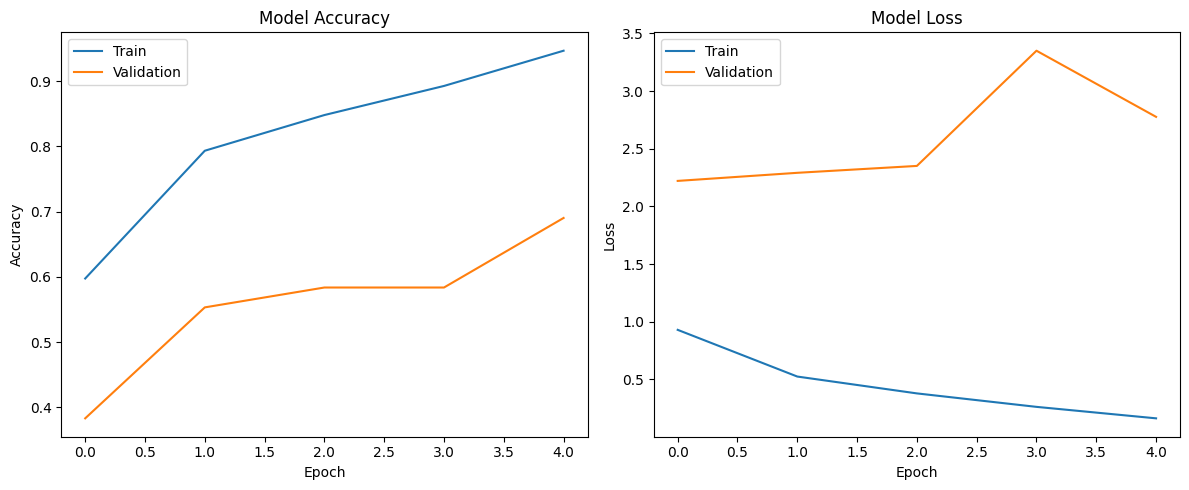

Final Training Accuracy: 0.9467
Final Validation Accuracy: 0.6904


In [ ]:

# plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.show()

plot_training_history(history)

print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

In [ ]:
model.save('brain_tumor_model.keras')